In [3]:
%pylab inline
import emeraldtriangles
import numpy as np
import pandas as pd
import triangle
import scipy.spatial


Populating the interactive namespace from numpy and matplotlib


# Example data

Data from [Matplotlib demos](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/tripcolor_demo.html#sphx-glr-gallery-images-contours-and-fields-tripcolor-demo-py)

In [4]:
from example_data import vertices, triangles, newpoints

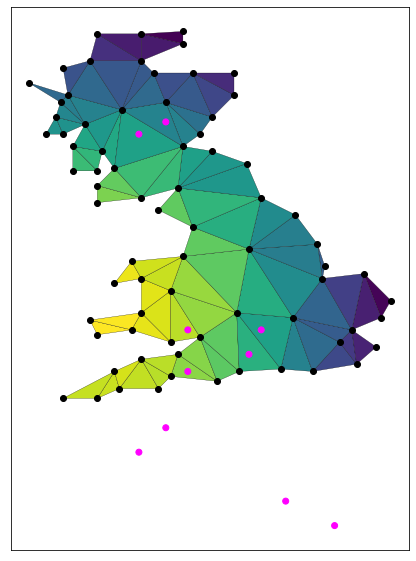

In [17]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
emeraldtriangles.plot(plt.gca(), **{"vertices": vertices, "triangles": triangles})
ax.scatter(newpoints["X"], newpoints["Y"], c=newpoints["color"], cmap="spring")
plt.show()

# Point-in-triangle test

Like point-in-polygon, but fast across a large number of triangles

In [4]:
points_and_triangles = emeraldtriangles.points_in_triangles(newpoints, vertices, triangles)
points_and_triangles

,point,triangle
0,0,4
1,1,16
2,2,20
3,3,17
4,4,57
5,5,60
6,6,-1
7,7,-1
8,8,-1
9,9,-1


# Adding points to a mesh

Split triangles in a mesh to add new nodes to the mesh

In [29]:
verticesp, trianglesp, leftover = emeraldtriangles.replace_triangles(newpoints, vertices, triangles)

In [40]:
verticesp.loc[leftover, "color"] = 0.5

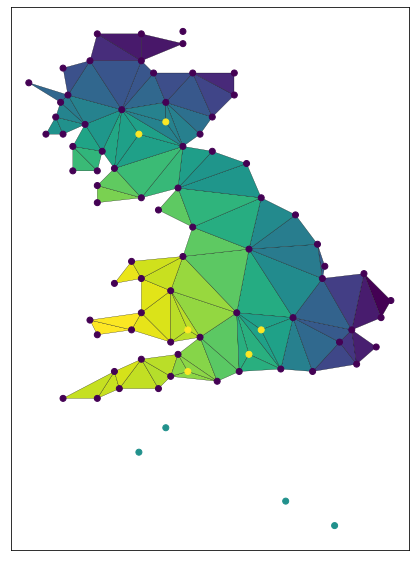

In [42]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
emeraldtriangles.plot(plt.gca(), **{"vertices": verticesp, "triangles": trianglesp})
plt.show()

In [9]:
# emeraldtriangles.append_nodes(points, triangle_nodes, triangle_faces)

In [51]:
tri = emeraldtriangles.supplant_triangles(verticesp, trianglesp)

In [52]:
# Set the "color" of new triangles to 1.5
tri["triangles"] = trianglesp.append(tri["triangles"]).fillna(1.5)

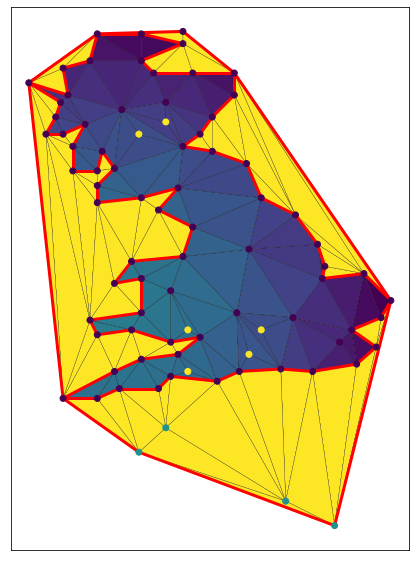

In [54]:
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_aspect('equal')
tri = dict(tri)
del tri["holes"]
emeraldtriangles.plot(ax, **tri)
plt.show()

# Mesh boundary polygon

Calculate the boundary edges of a mesh, as well as transform those edges into a polygon.

In [7]:
border_sides = emeraldtriangles.mesh_boundary(triangles)
boundaries = emeraldtriangles.mesh_boundary_to_pointlists(border_sides)

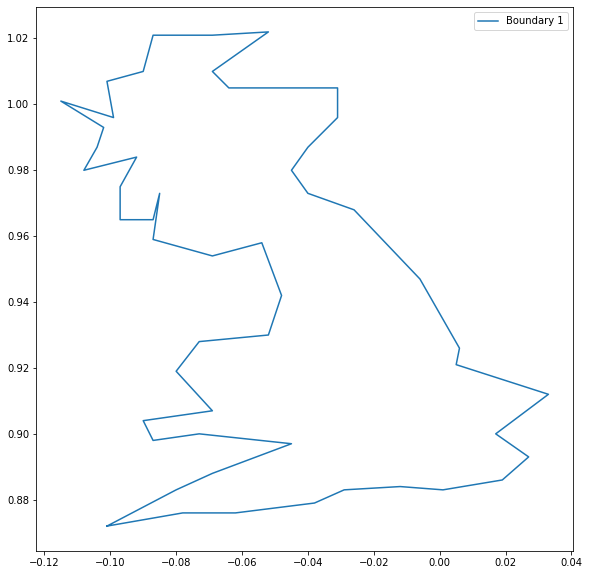

In [8]:
fig = plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
for idx, boundary in boundaries.items():
    boundary = vertices.loc[boundary]
    plt.plot(boundary["X"], boundary["Y"], label="Boundary %s" % idx)
plt.legend()
plt.show()